## Introduction 

- Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores in the United States, headquartered in Bentonville, Arkansas.The company was founded by Sam Walton and James "Bud" Walton in nearby Rogers, Arkansas in 1962 and incorporated under Delaware General Corporation Law on October 31, 1969. It also owns and operates Sam's Club retail warehouses.

## Aim of Walmart Sales Forecasting

- Sales forecasting or predicting the future is very important for every business. It is used for companies to making plans for high revenue, keep costs lower and high efficiency.  Companies made short-term and long term future planning as per forecasting data. Based on past data with some assumption which predict future trends and draw their budget accordingly.

- There are many factors like Market changes, Product changes, Economic conditions, season changes, etc; which impact to forecast of sales. Companies can make a plane to meet future demands and make improvements in their sales by keeping in mind these various factors.

## Dataset Overview

- This data set is available on the kaggle website. These data sets contained information about the stores, departments, temperature, unemployment, CPI, isHoliday, and MarkDowns.
- The data collected ranges from 2010 to 2012, where 45 Walmart stores across the country were included in this analysis. Each store contains several departments, and we are tasked with predicting the department-wide sales for each store. It is important to note that we also have external data available like CPI, Unemployment Rate and Fuel Prices in the region of each stores.

## Datasets

- Walmart Recruiting - Store Sales Forecasting downloaded from https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting

# Datatypes of features
- Nominal Data = Nominal data is one of the types of qualitative information which helps to label the variables without providing the numerical value. Nominal data is also called the nominal scale
- Odinal Data = Ordinal data/variable is a type of data that follows a natural order. The significant feature of the nominal data is that the difference between the data values is not determined
- Discrete Data = Discrete data can take only discrete values. Discrete information contains only a finite number of possible values.
- Continuous Data = Continuous data is data that can be calculated. It has an infinite number of probable values that can be selected within a given specific range.
- Binary Data =In statistics, binary data is a statistical data type consisting of categorical data that can take exactly two possible values, such as "A" and "B", or "heads" and "tails"

### train.csv - CSV Data file containing following attributes
- Store
- Dept
- Date
- Weekly_Sales
- IsHoliday
- 115064 Data rows
### stores.csv - CSV Data File containing following attributes
- Store
- Type
- Size
- 45 Data rows
### features.csv - CSV Data file containing following attributes
- Store
- Date
- Temperature
- Fuel_Price
- MarkDown1
- MarkDown2
- MarkDown3
- MarkDown4
- MarkDown5
- CPI
- Unemployment
- IsHoliday
- 8190 Data rows

## Objective

- Predict the sales for each department using historical markdown data from the Walmart dataset containing data of 45 Walmart stores.
- The purpose of this project is to develop a predictive model and find out the sales of each product at a given Walmart store. 
- Predict which departments are affected with the holiday markdown events and the extent of impact.
- Perform dimensionality reduction to improve prediction error by shrinkage in order to reduce overfitting.

# Data Analysis

### 1)Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling

## 2)Load Datasets

In [2]:
#Getting data from csv
features=pd.read_csv("features1.csv")
store=pd.read_csv("stores1.csv")
train=pd.read_csv("train1.csv")

##  3)Processing and merging datasets

In [3]:
features.shape

(8190, 12)

#### Observation=This dataset consist of records 8190 and Features 12

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05-02-2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12-02-2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19-02-2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26-02-2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05-03-2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


#### Observation= Checking top five values

In [5]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,28-06-2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05-07-2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12-07-2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19-07-2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,26-07-2013,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


#### Observation= Checking last five values

In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


#### Observation= Checking information of dataset

### Training Dataset

In [7]:
train.shape

(421570, 5)

#### Observation=This dataset consist of records 421570 and Features 5

In [8]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05-02-2010,24924.50,False
1,1,1,12-02-2010,46039.49,True
2,1,1,19-02-2010,41595.55,False
3,1,1,26-02-2010,19403.54,False
4,1,1,05-03-2010,21827.90,False


In [9]:
train.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,28-09-2012,508.37,False
421566,45,98,05-10-2012,628.10,False
421567,45,98,12-10-2012,1061.02,False
421568,45,98,19-10-2012,760.01,False
421569,45,98,26-10-2012,1076.80,False


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


#### Observation= Checking information of dataset

### Dataset containing  data of Stores

In [11]:
store.shape

(45, 3)

In [12]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [13]:
store.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [14]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


## Merging Dataset

In [15]:
#reseting train
train=train.groupby(['Store','Dept','Date'])['Weekly_Sales'].sum()
train=train.reset_index()
train.head(10)

,Store,Dept,Date,Weekly_Sales
0,1,1,01-04-2011,20398.09
1,1,1,01-06-2012,16065.49
2,1,1,01-07-2011,15363.50
3,1,1,01-10-2010,20094.19
4,1,1,02-03-2012,20113.03
5,1,1,02-04-2010,57258.43
6,1,1,02-07-2010,16333.14
7,1,1,02-09-2011,15277.27
8,1,1,02-12-2011,25293.49
9,1,1,03-02-2012,23510.49


In [16]:
#merging train and feature
data=pd.merge(train,features,on=['Store','Date'],how='inner')
data.head(10)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,01-04-2011,20398.09,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False
1,1,2,01-04-2011,46991.58,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False
2,1,3,01-04-2011,8734.19,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False
3,1,4,01-04-2011,34451.90,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False
4,1,5,01-04-2011,23598.55,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False
5,1,6,01-04-2011,3249.27,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False
6,1,7,01-04-2011,20144.71,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False
7,1,8,01-04-2011,35319.05,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False
8,1,9,01-04-2011,28388.25,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False
9,1,10,01-04-2011,30863.93,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False


In [17]:
data.shape

(421570, 14)

In [18]:
#merging store with data
data=pd.merge(data,store,on=['Store'],how='inner')
data

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,01-04-2011,20398.09,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False,A,151315
1,1,2,01-04-2011,46991.58,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False,A,151315
2,1,3,01-04-2011,8734.19,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False,A,151315
3,1,4,01-04-2011,34451.90,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False,A,151315
4,1,5,01-04-2011,23598.55,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,31-12-2010,2072.46,29.67,3.179,NaN,NaN,NaN,NaN,NaN,182.571448,8.724,True,B,118221
421566,45,94,31-12-2010,3966.80,29.67,3.179,NaN,NaN,NaN,NaN,NaN,182.571448,8.724,True,B,118221
421567,45,95,31-12-2010,43149.88,29.67,3.179,NaN,NaN,NaN,NaN,NaN,182.571448,8.724,True,B,118221
421568,45,97,31-12-2010,5881.22,29.67,3.179,NaN,NaN,NaN,NaN,NaN,182.571448,8.724,True,B,118221


In [19]:
#sorting values of Data
data=data.sort_values(by='Date')
data

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,01-04-2011,20398.09,59.17,3.524,NaN,NaN,NaN,NaN,NaN,214.837166,7.682,False,A,151315
148053,16,34,01-04-2011,4535.17,35.75,3.461,NaN,NaN,NaN,NaN,NaN,192.269171,6.339,False,B,57197
148054,16,35,01-04-2011,845.00,35.75,3.461,NaN,NaN,NaN,NaN,NaN,192.269171,6.339,False,B,57197
148055,16,36,01-04-2011,1172.50,35.75,3.461,NaN,NaN,NaN,NaN,NaN,192.269171,6.339,False,B,57197
148056,16,38,01-04-2011,57659.83,35.75,3.461,NaN,NaN,NaN,NaN,NaN,192.269171,6.339,False,B,57197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330701,34,16,31-12-2010,2792.33,34.11,2.955,NaN,NaN,NaN,NaN,NaN,127.087677,10.210,True,A,158114
330700,34,14,31-12-2010,9634.55,34.11,2.955,NaN,NaN,NaN,NaN,NaN,127.087677,10.210,True,A,158114
330699,34,13,31-12-2010,22824.12,34.11,2.955,NaN,NaN,NaN,NaN,NaN,127.087677,10.210,True,A,158114
330719,34,34,31-12-2010,9033.50,34.11,2.955,NaN,NaN,NaN,NaN,NaN,127.087677,10.210,True,A,158114


In [20]:
data.shape

(421570, 16)

In [21]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday     421570 non-null  bool   
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [23]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


## Null Values and Reduction

In [24]:
data.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Type             object
Size              int64
dtype: object

In [25]:
data.isnull()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
148053,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
148054,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
148055,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
148056,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330701,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
330700,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
330699,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False
330719,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False


In [26]:
data.isnull().sum().sum()

1422431

In [27]:
data=data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
data.head(10)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,01-04-2011,20398.09,59.17,3.524,214.837166,7.682,False,A,151315
148053,16,34,01-04-2011,4535.17,35.75,3.461,192.269171,6.339,False,B,57197
148054,16,35,01-04-2011,845.00,35.75,3.461,192.269171,6.339,False,B,57197
148055,16,36,01-04-2011,1172.50,35.75,3.461,192.269171,6.339,False,B,57197
148056,16,38,01-04-2011,57659.83,35.75,3.461,192.269171,6.339,False,B,57197
148057,16,40,01-04-2011,33428.25,35.75,3.461,192.269171,6.339,False,B,57197
148058,16,41,01-04-2011,2555.26,35.75,3.461,192.269171,6.339,False,B,57197
148059,16,42,01-04-2011,2998.87,35.75,3.461,192.269171,6.339,False,B,57197
148060,16,44,01-04-2011,3894.04,35.75,3.461,192.269171,6.339,False,B,57197
148061,16,45,01-04-2011,11.47,35.75,3.461,192.269171,6.339,False,B,57197


In [28]:
data.drop(['Date'],axis=1,inplace=True)

## Total values in our dataset

In [29]:
(421570* 16)

6745120

- Observation : Total observation in dataset is 67,45,120

# observation:
- MarkDown1       270889
- MarkDown2       310322
- MarkDown3       284479
- MarkDown4       286603
- MarkDown5       270138 
- So these are null value which we drop to make data clean.

In [30]:
270889+310322+284479+286603+270138

1422431

## This is dropout null values which is 1422431

In [31]:
data.shape

(421570, 10)

- Shape of Dataset after cleaning null values

- Manipulating data. Transform data into useful information and deleting unnecessary items. Getting the final data.

- Removing the unnecessary columns.

# EDA

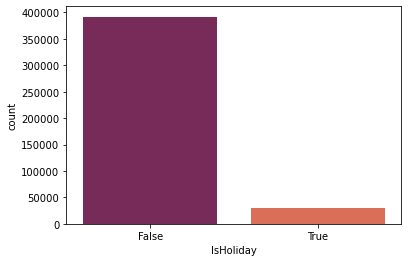

In [32]:
sns.countplot(x="IsHoliday", data=data,palette='rocket')
plt.show()

## Observation
- Sales on holiday is a little  more than sales in not-holiday
- True = notholiday False = Holiday

## Converting IsHoliday in Holiday which is integer and 1 for holiday and 0 otherwise.

In [33]:
data['Holiday']=[int(i) for i in list(data.IsHoliday)]
data.head(10)

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Holiday
0,1,1,20398.09,59.17,3.524,214.837166,7.682,False,A,151315,0
148053,16,34,4535.17,35.75,3.461,192.269171,6.339,False,B,57197,0
148054,16,35,845.00,35.75,3.461,192.269171,6.339,False,B,57197,0
148055,16,36,1172.50,35.75,3.461,192.269171,6.339,False,B,57197,0
148056,16,38,57659.83,35.75,3.461,192.269171,6.339,False,B,57197,0
148057,16,40,33428.25,35.75,3.461,192.269171,6.339,False,B,57197,0
148058,16,41,2555.26,35.75,3.461,192.269171,6.339,False,B,57197,0
148059,16,42,2998.87,35.75,3.461,192.269171,6.339,False,B,57197,0
148060,16,44,3894.04,35.75,3.461,192.269171,6.339,False,B,57197,0
148061,16,45,11.47,35.75,3.461,192.269171,6.339,False,B,57197,0


## Again checking for null values and verify that data is clean.

In [34]:
data.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
Holiday         0
dtype: int64

# Statistical Information

### Correlation
- It is relation between two groups or two column or feature
- Relation between +1 to -1

In [35]:
data.corr()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Size,Holiday
Store,1.000000,0.024004,-0.085195,-0.050097,0.065290,-0.211088,0.208552,-0.000548,-0.182881,-0.000548
Dept,0.024004,1.000000,0.148032,0.004437,0.003572,-0.007477,0.007837,0.000916,-0.002966,0.000916
Weekly_Sales,-0.085195,0.148032,1.000000,-0.002312,-0.000120,-0.020921,-0.025864,0.012774,0.243828,0.012774
Temperature,-0.050097,0.004437,-0.002312,1.000000,0.143859,0.182112,0.096730,-0.155949,-0.058313,-0.155949
Fuel_Price,0.065290,0.003572,-0.000120,0.143859,1.000000,-0.164210,-0.033853,-0.078281,0.003361,-0.078281
CPI,-0.211088,-0.007477,-0.020921,0.182112,-0.164210,1.000000,-0.299953,-0.001944,-0.003314,-0.001944
Unemployment,0.208552,0.007837,-0.025864,0.096730,-0.033853,-0.299953,1.000000,0.010460,-0.068238,0.010460
IsHoliday,-0.000548,0.000916,0.012774,-0.155949,-0.078281,-0.001944,0.010460,1.000000,0.000593,1.000000
Size,-0.182881,-0.002966,0.243828,-0.058313,0.003361,-0.003314,-0.068238,0.000593,1.000000,0.000593
Holiday,-0.000548,0.000916,0.012774,-0.155949,-0.078281,-0.001944,0.010460,1.000000,0.000593,1.000000


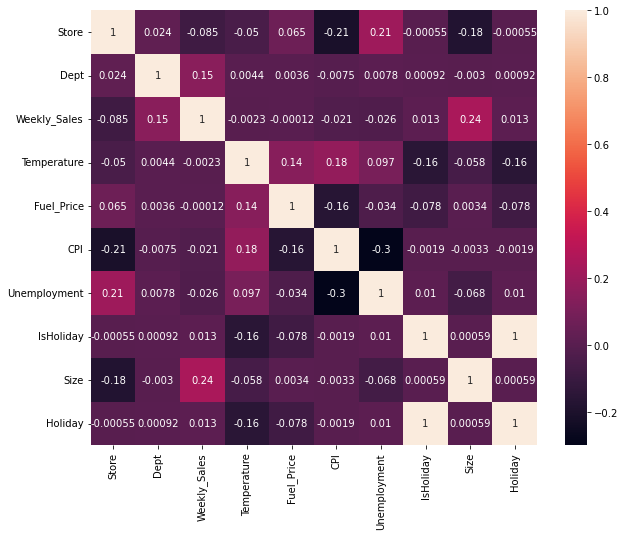

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Observation = The value of correlation can take any value from -1 to 1.
- Values which appears in the dark color it shows strong correlation between each other.

## Covariance
- Covariance provides the measure of strength of correlation between two variable or more set of variable
- The mean of each variable is used as referance and relative position of observations compared to mean is important.

In [37]:
data.cov()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Size,Holiday
Store,163.463829,9.357829,-2.473800e+04,-11.815980,0.382747,-105.683840,4.968284,-0.001792,-1.425844e+05,-0.001792
Dept,9.357829,929.765358,1.025138e+05,2.495613,0.049940,-8.928349,0.445252,0.007144,-5.515902e+03,0.007144
Weekly_Sales,-24738.004636,102513.775825,5.157979e+08,-968.855983,-1.252687,-18606.462689,-1094.491917,74.197710,3.376874e+08,74.197710
Temperature,-11.815980,2.495613,-9.688560e+02,340.326164,1.216851,131.558813,3.324999,-0.735776,-6.560005e+04,-0.735776
Fuel_Price,0.382747,0.049940,-1.252687e+00,1.216851,0.210236,-2.948414,-0.028922,-0.009180,9.398049e+01,-0.009180
CPI,-105.683840,-8.928349,-1.860646e+04,131.558813,-2.948414,1533.448867,-21.886169,-0.019464,-7.914538e+03,-0.019464
Unemployment,4.968284,0.445252,-1.094492e+03,3.324999,-0.028922,-21.886169,3.471872,0.004984,-7.753563e+03,0.004984
IsHoliday,-0.001792,0.007144,7.419771e+01,-0.735776,-0.009180,-0.019464,0.004984,0.065408,9.248907e+00,0.065408
Size,-142584.425165,-5515.902194,3.376874e+08,-65600.051634,93.980492,-7914.538190,-7753.563346,9.248907,3.718632e+09,9.248907
Holiday,-0.001792,0.007144,7.419771e+01,-0.735776,-0.009180,-0.019464,0.004984,0.065408,9.248907e+00,0.065408


## Standard Deviation
- A quantity expressing by how much the members of group differ from the mean value for group.
- The standard deviation is used in conjuction with the mean to summarise continous data,not categorical data

In [38]:
data.std()

Store              12.785297
Dept               30.492054
Weekly_Sales    22711.183519
Temperature        18.447931
Fuel_Price          0.458515
CPI                39.159276
Unemployment        1.863296
IsHoliday           0.255750
Size            60980.583328
Holiday             0.255750
dtype: float64

## Problem Statement
- Sales according to Store Types

# Box plot 

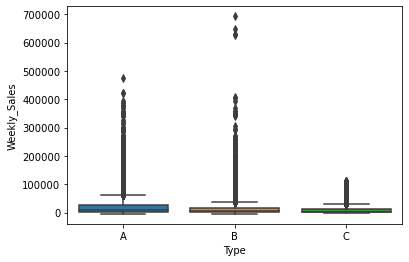

In [39]:
sns.boxplot(x='Type',y='Weekly_Sales',data=data)
plt.show()

#### Obsevation= There is trace of outliers which can be removed in data processing

## Problem Statement
Store distribution according to Type

# Pie Chart 

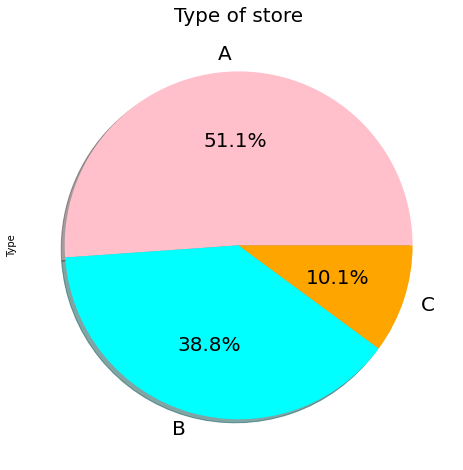

In [40]:
plt.figure(figsize=(10,8))
plt.title('Type of store',fontsize=20)
data['Type'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,colors=['pink','cyan','orange'],fontsize=20)
plt.show()

#### Observation=Store wise distribution of weekly sales
- store type A has highest sale among other two store type

## Problem Statement
Sales based on weekdays and Holidays

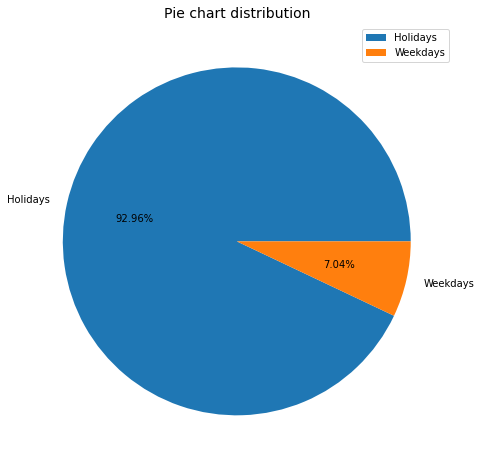

In [41]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['Holidays','Weekdays'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

#### Observation= Sales on Weekdays and Holidays
- Maximum sales are on Holidays

# Count Plot

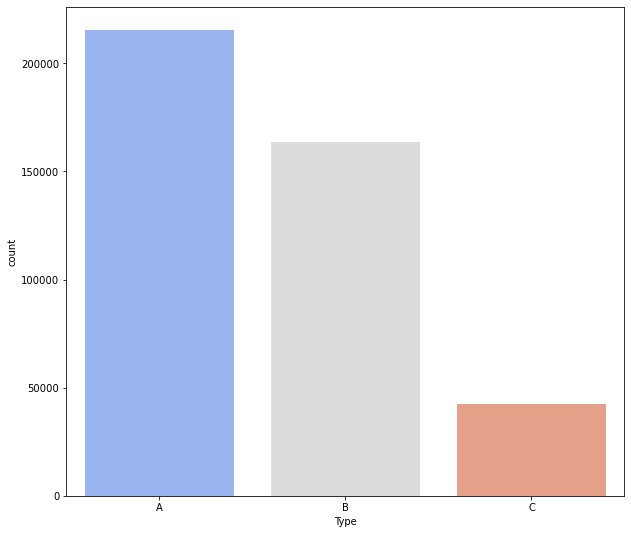

In [42]:
plt.figure(figsize=(10,9))
sns.countplot(x="Type", data=data,palette='coolwarm')
plt.show()

#### Observation=Store wise distribution of weekly sales
- In countplot store type A has highest sale among other two store type

## Problem Statement
- Storewise Weekly Analysis of Sales

# Barplot

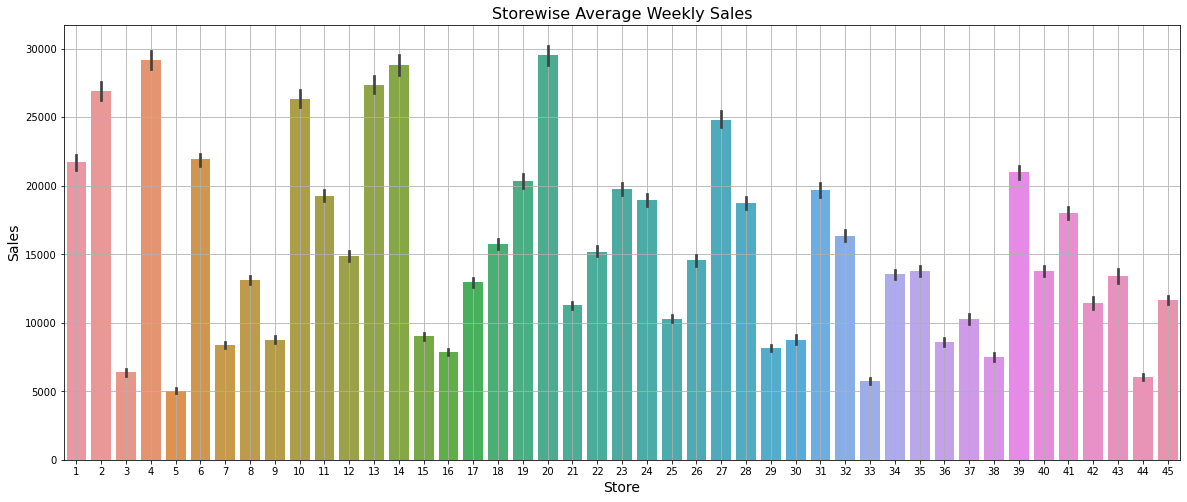

In [43]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Store',fontsize=14)
plt.title('Storewise Average Weekly Sales',fontsize=16)
plt.grid()
plt.show() 

#### Observation= Storewise average weekly sales
- Store no 20 has highest Sales according to barplot

## Problem Statement
- Sales according to weather

# Dist Plot

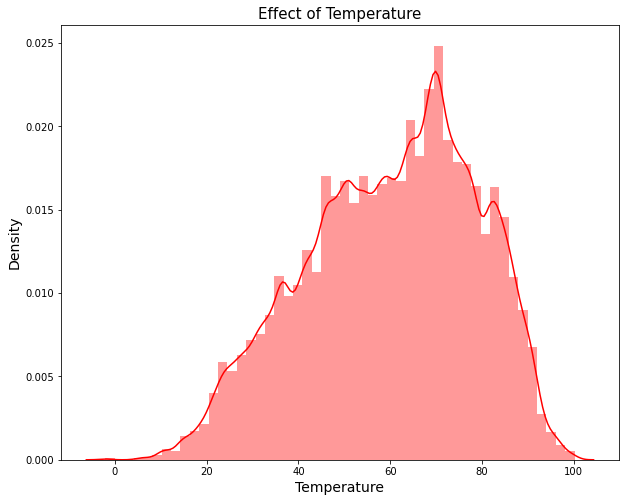

In [44]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'],color='red')
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

Observation= Effect of Temperature on Sales

## Data Splitted into Training, Validation, Test

In [45]:
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor



In [46]:
data.Type.replace({'A':0,'B':1,'C':2},inplace=True)

In [47]:
X = data.drop(['Weekly_Sales'],axis=1)
y = data.Weekly_Sales

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=1)

In [49]:
data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size', 'Holiday'],
      dtype='object')

## Decision Tree Regressor Model

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
model_DT = DecisionTreeRegressor()

In [52]:
model_DT


DecisionTreeRegressor()

In [53]:
model_DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [54]:
BDT=model_DT.score(X_test, y_test)*100
BDT

89.35276487632198

Decision Tree Regressor gives us 89% of Accuracy.

# Random Forest Regressor Model

In [55]:
 from sklearn.ensemble import RandomForestRegressor

In [56]:
model_RFR = RandomForestRegressor()

In [57]:
model_RFR


RandomForestRegressor()

In [58]:
model_RFR.fit(X_train,y_train)


RandomForestRegressor()

In [59]:
RFR =model_RFR.score(X_test, y_test)*100
RFR

94.34931683764293

Random Forest Regressor gives us 94% of Accuracy

## XGBoost Model

In [60]:
import xgboost as xgb

In [61]:
model_xgb = xgb.XGBRegressor()

In [62]:
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [63]:
model_xgb.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [64]:
xgb = model_xgb.score(X_test, y_test)*100

In [65]:
xgb

91.68118105991944

XGBoost Regressor gives us 91% of Accuracy.


# K Neighbors Regressor Model

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsRegressor(weights = 'uniform')
     

In [68]:
model_knn=knn.fit(X_train,y_train)

In [69]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)
     

KNeigbhbors Regressor Accuracy -  59.24557905010239


 KNeigbhbors Regressor gives Accuracy 59%

## Machine Learning Model Comparison

In [70]:
Models = pd.DataFrame({'Model': [ 'Decision Tree', 
 'Random Forest','XGBoost','KNN'], 
 'Accuracy': [BDT, RFR, xgb , knn_acc]})

In [71]:
Models

,Model,Accuracy
0,Decision Tree,89.352765
1,Random Forest,94.349317
2,XGBoost,91.681181
3,KNN,59.245579


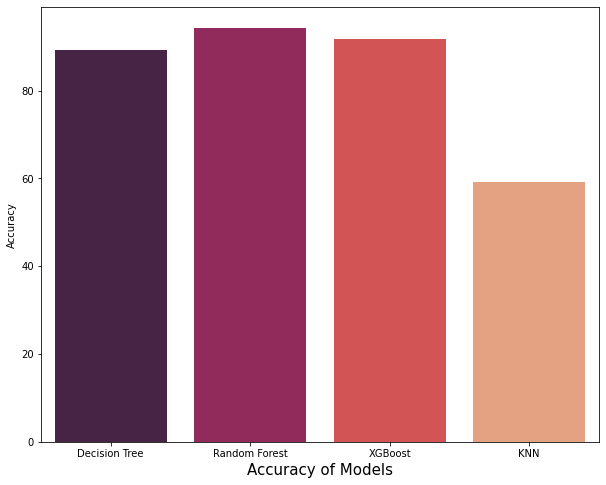

In [72]:
plt.figure(figsize=(10,8))
sns.barplot(x='Model',y='Accuracy',data=Models,palette='rocket')
plt.xlabel('Accuracy of Models', fontsize =15)
plt.show()
     

# Dataset features
- Store = Continious Datatype
- Dept =  Continious Datatype
- Weekly_Sales =  Continious Datatype
- Temperature =  Continious Datatype
- Fuel_Price = Discrete Datatype
- CPI = Odinal Datatype
- Unemployment = Odinal Datatype
- IsHoliday =  Discrete Datatype
- Type = Odinal Datatype
- Size =  Continious Datatype
- Holiday = Binary Datatype

# Predictor

In [73]:
y_predict=model_RFR.predict(X_test)

In [74]:
y_predict

array([ 5855.794 , 58062.9328,  3405.9658, ..., 12411.2243,   310.8452,
       24509.45  ])

# 1)Inputs
- Store = 33
- Dept =  12
- Temperature = 50 degree celcius
- Fuel_Price = 4
- CPI = 190
- Unemployment =8
- IsHoliday =  True
- Type = B(1)
- Size = 60000
- Holiday = True(1)

In [75]:
model_RFR.predict([[33,12,50,4,190,8,True,1,60000,1]])

array([5564.3136])

Observation= Predicted Weekly Sales by our Machine Learning Model is 5519.526 by the following input

# 2)Output

- Weekly Sales

# Conclusion

- Following inferences and conclusions can be drawn from the the analysis of the data:

- Type 'A' stores are more popular than 'B' and 'C' types.

- Type 'A' stores outclass the 'B' and 'C' types in terms of size and the avergae weekly sales.

- Weekly Sales are affected by the week of year. Holiday weeks witnessed more sales than the non-holiday weeks. Notables are Thanksgiving and Christmas weeks.

- Size of the store is a major contributing factor in the weekly sales.

- Sales are also dependent on the department of the store as different departments showed different levels of weekly sales.

- Among the trained models for predicting the future sales, Random Forest Machine with tuned hyperparameters performs the best.